In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import os
import seaborn as sns

In [2]:
def create_combined_data(experiments):
    steps_set = set([0, 100000])
    for df in experiments:
        steps_set.update(df['Step'].tolist())
    
    list_of_steps = sorted(list(steps_set))
    data_for_exp = []
    intepolated_dfs = []
    for df in experiments:
        f = interp1d(df['Step'].tolist(), df['Value'].tolist(), fill_value="extrapolate", kind="previous")
        new_values = f(list_of_steps)
        combined_data = [[list_of_steps[i], new_values[i]] for i in range(len(list_of_steps))]
        df_np_arr = np.array(combined_data)
        column_values = ['Step', 'Value']
        df = pd.DataFrame(data = df_np_arr, columns = column_values)
        intepolated_dfs.append(df)
    return intepolated_dfs   

           Step  Success      cat  run
0           0.0      0.0     DREF    1
1         143.0      0.0     DREF    1
2         146.0      0.0     DREF    1
3         162.0      0.0     DREF    1
4         168.0      0.0     DREF    1
...         ...      ...      ...  ...
77670  149876.0  64125.0  EF-100%    5
77671  149883.0  64125.0  EF-100%    5
77672  149888.0  64125.0  EF-100%    5
77673  149942.0  64225.0  EF-100%    5
77674  149952.0  64225.0  EF-100%    5

[77675 rows x 4 columns]


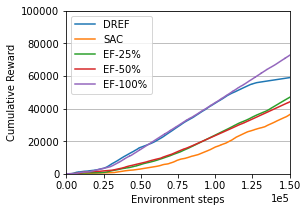

In [7]:
# BallBasket 

experiments = [
    {
        "cat": "DREF",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1.csv",
    },
    {
        "cat": "DREF",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2.csv",
    },
    {
        "cat": "DREF",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3.csv",
    },
    {
        "cat": "DREF",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4.csv",
    },
    {
        "cat": "DREF",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_1.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_2.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_3.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_4.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_5.csv",
#     },
    
    {
        "cat": "SAC",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_1.csv",
    },
    {
        "cat": "SAC",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_2.csv",
    },
    {
        "cat": "SAC",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_3.csv",
    },
    {
        "cat": "SAC",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_4.csv",
    },
    {
        "cat": "SAC",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/SAC/SAC_5.csv",
    },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_5.csv",
    },
]
grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=None)
ax.set_xlim(0, 1.5e5)
ax.set_ylim(0, 1e5)
# ax.set_yticks(np.arange(0, 1e5, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "upper left")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Cumulative Reward")
ax.grid(visible=True, axis='y')
# fig.savefig("BallBasketTaskRewardsTEMP.pdf", bbox_inches='tight')


           Step      Success      cat  run
0           0.0     0.000000     DREF    1
1         772.0     0.000000     DREF    1
2         995.0     0.000000     DREF    1
3        1106.0     0.000000     DREF    1
4        1615.0     0.000000     DREF    1
...         ...          ...      ...  ...
71820   99974.0  8434.999995  EF-100%    5
71821   99982.0  8434.999995  EF-100%    5
71822   99988.0  8434.999995  EF-100%    5
71823   99996.0  8444.999969  EF-100%    5
71824  100000.0  8444.999969  EF-100%    5

[71825 rows x 4 columns]


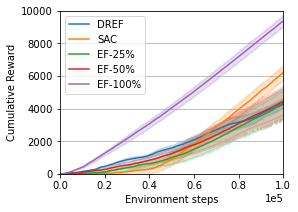

In [7]:
#Reaching 

experiments = [
    {
        "cat": "DREF",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1.csv",
    },
    {
        "cat": "DREF",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2.csv",
    },
    {
        "cat": "DREF",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3.csv",
    },
    {
        "cat": "DREF",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4.csv",
    },
    {
        "cat": "DREF",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_1.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_2.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_3.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_4.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_5.csv",
#     },
    
    {
        "cat": "SAC",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_1.csv",
    },
    {
        "cat": "SAC",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_2.csv",
    },
    {
        "cat": "SAC",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_3.csv",
    },
    {
        "cat": "SAC",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_4.csv",
    },
    {
        "cat": "SAC",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/SAC/SAC_5.csv",
    },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_5.csv",
    },
]
grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68)
ax.set_xlim(0, 1.0e5)
ax.set_ylim(0, 1.0e4)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "upper left")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Cumulative Reward")
ax.grid(visible=True, axis='y')
fig.savefig("ReachingTaskRewards.pdf", bbox_inches='tight')


           Step       Success      cat  run
0           0.0      0.000000     DREF    1
1         365.0      0.000000     DREF    1
2         412.0      0.000000     DREF    1
3         456.0      0.000000     DREF    1
4         531.0      0.000000     DREF    1
...         ...           ...      ...  ...
17160  149337.0  27719.106865  EF-100%    5
17161  149696.0  27719.106865  EF-100%    5
17162  149760.0  27719.106865  EF-100%    5
17163  149788.0  27976.056168  EF-100%    5
17164  149991.0  27976.056168  EF-100%    5

[17165 rows x 4 columns]


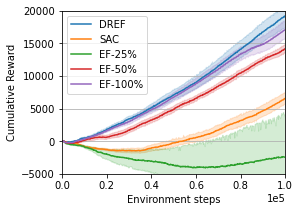

In [8]:
#Lunar Lander 

experiments = [
    {
        "cat": "DREF",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1.csv",
    },
    {
        "cat": "DREF",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2.csv",
    },
    {
        "cat": "DREF",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3.csv",
    },
    {
        "cat": "DREF",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4.csv",
    },
    {
        "cat": "DREF",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_1.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_2.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_3.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_4.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_5.csv",
#     },
    
    {
        "cat": "SAC",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_1.csv",
    },
    {
        "cat": "SAC",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_2.csv",
    },
    {
        "cat": "SAC",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_3.csv",
    },
    {
        "cat": "SAC",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_4.csv",
    },
    {
        "cat": "SAC",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/SAC/SAC_5.csv",
    },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_5.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_1.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_2.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_3.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_4.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_5.csv",
    },
]
grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
        
# print(dfs)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68)
ax.set_xlim(0, 1.0e5)
ax.set_ylim(-5e3, 2.0e4)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "upper left")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Cumulative Reward")
ax.grid(visible=True, axis='y')
fig.savefig("LunarLanderTaskRewards.pdf", bbox_inches='tight')


          Step      Success           cat  run
0          0.0     0.000000  DREF - 12.3%    1
1         42.0     0.000000  DREF - 12.3%    1
2         53.0     0.000000  DREF - 12.3%    1
3         60.0     0.000000  DREF - 12.3%    1
4         80.0   130.000000  DREF - 12.3%    1
...        ...          ...           ...  ...
1825    1187.0  2507.407379        EF-50%    5
1826    1191.0  2610.714333        EF-50%    5
1827    1198.0  2610.714333        EF-50%    5
1828    1199.0  2610.714333        EF-50%    5
1829  100000.0  2610.714333        EF-50%    5

[1830 rows x 4 columns]


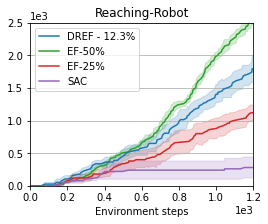

In [12]:
#Reaching Robot
HUE_ORDER_1=[
    
    "EF-50%",
    "EF-25%",
    "SAC",
    "DREF - 12.3%",
]
COLOR_PALLETE=[
    
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
    (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

sns.set_palette(COLOR_PALLETE)

experiments = [
#     {
#         "cat": "DREF - 12.3%",
#         "run": 1,
#         "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject1.csv",
#     },
    {
        "cat": "DREF - 12.3%",
        "run": 2,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject2.csv",
    },
    {
        "cat": "DREF - 12.3%",
        "run": 3,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject3.csv",
    },
    {
        "cat": "DREF - 12.3%",
        "run": 4,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject4.csv",
    },
    {
        "cat": "DREF - 12.3%",
        "run": 5,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject5.csv",
    },
    {
        "cat": "DREF - 12.3%",
        "run": 6,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject6.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_1.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_2.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_3.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_4.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_5.csv",
#     },
    
    {
        "cat": "SAC",
        "run": 1,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_1.csv",
    },
    {
        "cat": "SAC",
        "run": 2,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_2.csv",
    },
    {
        "cat": "SAC",
        "run": 3,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_3.csv",
    },
    {
        "cat": "SAC",
        "run": 4,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_4.csv",
    },
    {
        "cat": "SAC",
        "run": 5,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_5.csv",
    },
    
#     {
#         "cat": "EF-25%",
#         "run": 1,
#         "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject1.csv",
#     },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject2.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject3.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject4.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject5.csv",
    },
    {
        "cat": "EF-25%",
        "run": 6,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject6.csv",
    },
    
#     {
#         "cat": "EF-50%",
#         "run": 1,
#         "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject1.csv",
#     },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject2.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject3.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject4.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject5.csv",
    },
    {
        "cat": "EF-50%",
        "run": 6,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject6.csv",
    },
]
grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68, hue_order=HUE_ORDER_1)
ax.set_xlim(0, 1.2e3)
ax.set_ylim(0, 2.5e3)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
new_handles = [handles[-1]]
new_handles.extend(handles[0:-1])

new_labels = [labels[-1]]
new_labels.extend(labels[0:-1])

ax.legend(handles=new_handles[0:], labels=new_labels[0:])
sns.move_legend(ax, "upper left")
ax.set_xlabel("Environment steps")
# ax.set_ylabel("Cumulative Reward")
ax.set_title("Reaching-Robot")
ax.yaxis.label.set_visible(False)
ax.grid(visible=True, axis='y')
fig.savefig("ReachingTaskRobotAll.pdf", bbox_inches='tight')


         Step   Success           cat  run
0         0.0  0.881890  DREF - 12.3%    1
1        53.0  0.881890  DREF - 12.3%    1
2        60.0  0.881890  DREF - 12.3%    1
3        80.0  0.881890  DREF - 12.3%    1
4        99.0  0.881890  DREF - 12.3%    1
..        ...       ...           ...  ...
919    1186.0  0.513397        EF-50%    4
920    1187.0  0.513901        EF-50%    4
921    1198.0  0.513901        EF-50%    4
922    1199.0  0.513901        EF-50%    4
923  100000.0  0.513901        EF-50%    4

[924 rows x 4 columns]
0.1231788098812103, 0.01998608628347266
0.24568517133593554, 0.005970064611516156
0.5019119381904602, 0.010517541073326085
{'DREF - 12.3%': [0.1504028588533401, 0.1030150726437568, 0.1050691232085228, 0.1342281848192215], 'EF-25%': [0.246415764093399, 0.2392586320638656, 0.2550335526466369, 0.2420327365398407], 'EF-50%': [0.4849863648414612, 0.5041736364364624, 0.5045871734619141, 0.5139005780220032]}


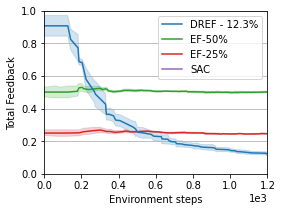

In [6]:
#Reaching Robot Feedback
HUE_ORDER_1=[
    
    "EF-50%",
    "EF-25%",
    "SAC",
    "DREF - 12.3%",
]
COLOR_PALLETE=[
    
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
    (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

sns.set_palette(COLOR_PALLETE)

experiments = [
    {
        "cat": "DREF - 12.3%",
        "run": 1,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject1_feedback.csv",
    },
    {
        "cat": "DREF - 12.3%",
        "run": 2,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject2_feedback.csv",
    },
    {
        "cat": "DREF - 12.3%",
        "run": 3,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject3_feedback.csv",
    },
    {
        "cat": "DREF - 12.3%",
        "run": 4,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_active/subject4_feedback.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_1_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_2_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_3_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_4_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_5_feedback.csv",
#     },
    
#     {
#         "cat": "SAC",
#         "run": 1,
#         "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_1_feedback.csv",
#     },
#     {
#         "cat": "SAC",
#         "run": 2,
#         "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_2_feedback.csv",
#     },
#     {
#         "cat": "SAC",
#         "run": 3,
#         "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_3_feedback.csv",
#     },
#     {
#         "cat": "SAC",
#         "run": 4,
#         "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_4_feedback.csv",
#     },
#     {
#         "cat": "SAC",
#         "run": 5,
#         "csv": "reaching_task_results_all/robot_all_runs/sawyer_sac/run_5_feedback.csv",
#     },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject1_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject2_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject3_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_25/25_subject4_feedback.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject1_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject2_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject3_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "reaching_task_results_all/robot_all_runs/sawyer_random_50/50_subject4_feedback.csv",
    },
]
grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68, hue_order=HUE_ORDER_1)
ax.set_xlim(0, 1.2e3)
ax.set_ylim(0, 1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
new_handles = [handles[-1]]
new_handles.extend(handles[0:-1])

new_labels = [labels[-1]]
new_labels.extend(labels[0:-1])

ax.legend(handles=new_handles[0:], labels=new_labels[0:])
sns.move_legend(ax, "upper right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Total Feedback")
ax.grid(visible=True, axis='y')
fig.savefig("ReachingTaskRobotFeedback.pdf", bbox_inches='tight')
dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-1:].mean())
for exp in res:
    print(f"{np.mean(res[exp])}, {np.std(res[exp])}")
print(res)

           Step   Success        cat  run
0           0.0  0.616702  DREF-1.6%    1
1         556.0  0.616702  DREF-1.6%    1
2         693.0  0.616702  DREF-1.6%    1
3        1122.0  0.616702  DREF-1.6%    1
4        1199.0  0.616702  DREF-1.6%    1
...         ...       ...        ...  ...
91407   99936.0  1.000000    EF-100%    5
91408   99977.0  1.000000    EF-100%    5
91409   99982.0  1.000000    EF-100%    5
91410   99986.0  1.000000    EF-100%    5
91411  100000.0  1.000000    EF-100%    5

[91412 rows x 4 columns]
0.01646071132272476, 0.005326399669147796
0.2502025291323662, 0.0005508801683721718
0.4997858822345734, 0.0007138061695089322
1.0, 0.0
{'DREF-1.6%': [0.0193442553281784, 0.0246624667197465, 0.0088063403964042, 0.0137981409206986, 0.0156923532485961], 'EF-25%': [0.2502501904964447, 0.249737411737442, 0.251085102558136, 0.249737411737442], 'EF-50%': [0.4990245103836059, 0.500855028629303, 0.4993398189544678, 0.5004101395606995, 0.4992999136447906], 'EF-100%': [1.0, 1.

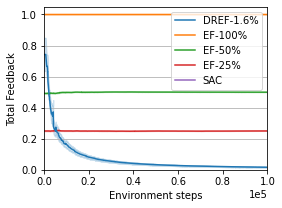

In [4]:
#Reaching Feedback
HUE_ORDER_1=[
    
    "EF-100%",
    "EF-50%",
    "EF-25%",
    "SAC",
#     "EF-1.6%",
    "DREF-1.6%",
]
COLOR_PALLETE=[
    
    (1.0, 0.4980392156862745, 0.054901960784313725),
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
#     (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

sns.set_palette(COLOR_PALLETE)

experiments = [
    {
        "cat": "DREF-1.6%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "DREF-1.6%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "DREF-1.6%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "DREF-1.6%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "DREF-1.6%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5_feedback.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_1_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_2_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_3_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_4_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "reaching_task_results_all/all_runs/BC/TamerSACBC_5_feedback.csv",
#     },
    
#     {
#         "cat": "EF-25%",
#         "run": 1,
#         "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_1_feedback.csv",
#     },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer25/TamerRLSACOptim_5_feedback.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer50/TamerRLSACOptim_5_feedback.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "reaching_task_results_all/all_runs/Tamer100/TamerRLSACOptim_5_feedback.csv",
    },
    
#     {
#         "cat": "EF-1.6%",
#         "run": 1,
#         "csv": "reaching_task_results_all/all_runs/Tamer1.6/TamerRLSACOptim_1_feedback.csv",
#     },
#     {
#         "cat": "EF-1.6%",
#         "run": 2,
#         "csv": "reaching_task_results_all/all_runs/Tamer1.6/TamerRLSACOptim_3_feedback.csv",
#     },
#     {
#         "cat": "EF-1.6%",
#         "run": 3,
#         "csv": "reaching_task_results_all/all_runs/Tamer1.6/TamerRLSACOptim_3_feedback.csv",
#     },
#     {
#         "cat": "EF-1.6%",
#         "run": 4,
#         "csv": "reaching_task_results_all/all_runs/Tamer1.6/TamerRLSACOptim_4_feedback.csv",
#     },
#     {
#         "cat": "EF-1.6%",
#         "run": 5,
#         "csv": "reaching_task_results_all/all_runs/Tamer1.6/TamerRLSACOptim_4_feedback.csv",
#     },
]

grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68, hue_order=HUE_ORDER_1)
ax.set_xlim(0, 1.0e5)
ax.set_ylim(0, 1.05)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()

new_handles = [handles[-1]]
new_handles.extend(handles[0:-1])

new_labels = [labels[-1]]
new_labels.extend(labels[0:-1])

ax.legend(handles=new_handles[0:], labels=new_labels[0:])
sns.move_legend(ax, "upper right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Total Feedback")
ax.grid(visible=True, axis='y')
fig.savefig("ReachingTaskFeedback.pdf", bbox_inches='tight')
dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-1:].mean())
for exp in res:
    print(f"{np.mean(res[exp])}, {np.std(res[exp])}")
print(res)

           Step   Success          cat  run
0           0.0  1.000000  DREF - 8.4%    1
1         143.0  1.000000  DREF - 8.4%    1
2         146.0  1.000000  DREF - 8.4%    1
3         162.0  1.000000  DREF - 8.4%    1
4         168.0  1.000000  DREF - 8.4%    1
...         ...       ...          ...  ...
56685   99901.0  0.084204      EF-8.4%    5
56686   99912.0  0.084204      EF-8.4%    5
56687   99974.0  0.084204      EF-8.4%    5
56688   99982.0  0.084204      EF-8.4%    5
56689  100000.0  0.084204      EF-8.4%    5

[56690 rows x 4 columns]
0.08431406691670415, 0.040469582899163505
0.2509163409471512, 0.0007080796803352503
0.5005730390548706, 0.001152239179825707
1.0, 0.0
0.08497037887573237, 0.0005271564247219552
{'DREF - 8.4%': [0.1447579264640808, 0.0837081372737884, 0.0248386934399604, 0.0617975853383541, 0.106467992067337], 'EF-25%': [0.2510198056697845, 0.2507987916469574, 0.2497397810220718, 0.2519528269767761, 0.251070499420166], 'EF-50%': [0.5019989013671875, 0.50166243

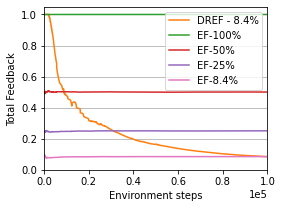

In [25]:
#BallBasket Feedback
HUE_ORDER_1=[
    
    "DREF - 8.4%",
    "EF-100%",
    "EF-50%",
    "EF-25%",
    "EF-8.4%"
]

experiments = [
    {
        "cat": "DREF - 8.4%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "DREF - 8.4%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "DREF - 8.4%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "DREF - 8.4%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "DREF - 8.4%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5_feedback.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_1_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_2_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_3_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_4_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "ballbasket_task_results_all/all_runs/BC/TamerSACBC_5_feedback.csv",
#     },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer25/TamerRLSACOptim_5_feedback.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer50/TamerRLSACOptim_5_feedback.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer100/TamerRLSACOptim_5_feedback.csv",
    },
    
    {
        "cat": "EF-8.4%",
        "run": 1,
        "csv": "ballbasket_task_results_all/all_runs/Tamer8.4/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-8.4%",
        "run": 2,
        "csv": "ballbasket_task_results_all/all_runs/Tamer8.4/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-8.4%",
        "run": 3,
        "csv": "ballbasket_task_results_all/all_runs/Tamer8.4/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-8.4%",
        "run": 4,
        "csv": "ballbasket_task_results_all/all_runs/Tamer8.4/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-8.4%",
        "run": 5,
        "csv": "ballbasket_task_results_all/all_runs/Tamer8.4/TamerRLSACOptim_5_feedback.csv",
    },
]

grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=None, hue_order=HUE_ORDER_1)
ax.set_xlim(0, 1.0e5)
ax.set_ylim(0, 1.05)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "upper right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Total Feedback")
ax.grid(visible=True, axis='y')
# fig.savefig("BallBasketTaskFeedback.pdf", bbox_inches='tight')
dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-1:].mean())
for exp in res:
    print(f"{np.mean(res[exp])}, {np.std(res[exp])}")
print(res)

           Step  Success          cat  run
0           0.0      1.0  DREF - 6.2%    1
1         365.0      1.0  DREF - 6.2%    1
2         412.0      1.0  DREF - 6.2%    1
3         456.0      1.0  DREF - 6.2%    1
4         531.0      1.0  DREF - 6.2%    1
...         ...      ...          ...  ...
15425  149337.0      1.0      EF-100%    5
15426  149696.0      1.0      EF-100%    5
15427  149760.0      1.0      EF-100%    5
15428  149788.0      1.0      EF-100%    5
15429  149991.0      1.0      EF-100%    5

[15430 rows x 4 columns]
0.06269769407808774, 0.022298774064341945
0.2503631234169006, 0.0008189369881093148
0.49907130002975464, 0.0012003630978880118
1.0, 0.0
{'DREF - 6.2%': [0.0779388472437858, 0.0299861785024404, 0.0909194275736808, 0.0444849841296672, 0.0701590329408645], 'EF-25%': [0.2500351965427398, 0.2508371472358703, 0.2498362958431244, 0.2517091333866119, 0.2493978440761566], 'EF-50%': [0.5000400543212891, 0.4991655349731445, 0.4982059895992279, 0.4973158538341522, 0

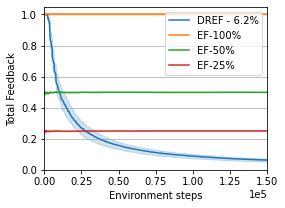

In [4]:
#Lunar Lander Feedback
HUE_ORDER_1=[
    
    "DREF - 6.2%",
    "EF-100%",
    "EF-50%",
    "EF-25%",
]

experiments = [
    {
        "cat": "DREF - 6.2%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "DREF - 6.2%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "DREF - 6.2%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "DREF - 6.2%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "DREF - 6.2%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/RPEActiveTamer/ActiveTamerRLSACOptim_5_feedback.csv",
    },
    
#     {
#         "cat": "BC",
#         "run": 1,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_1_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 2,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_2_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 3,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_3_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 4,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_4_feedback.csv",
#     },
#     {
#         "cat": "BC",
#         "run": 5,
#         "csv": "lunar_lander_results_all/all_runs/BC/TamerSACBC_5_feedback.csv",
#     },
    
    {
        "cat": "EF-25%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-25%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer25/TamerRLSACOptim_5_feedback.csv",
    },
    
    {
        "cat": "EF-50%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-50%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer50/TamerRLSACOptim_5_feedback.csv",
    },
    
    {
        "cat": "EF-100%",
        "run": 1,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_1_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 2,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_2_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 3,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_3_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 4,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_4_feedback.csv",
    },
    {
        "cat": "EF-100%",
        "run": 5,
        "csv": "lunar_lander_results_all/all_runs/Tamer100/TamerRLSACOptim_5_feedback.csv",
    },
]

grouped_data = {}
for experiment in experiments:
    curr_df = pd.read_csv(experiment['csv'])
    if experiment['cat'] in grouped_data:
        grouped_data[experiment['cat']].append(curr_df)
    else:
        grouped_data[experiment['cat']] = [curr_df]
dfs = []
for key in grouped_data:
    interpolated_dfs = create_combined_data(grouped_data[key])
    for run, df in enumerate(interpolated_dfs):
        df['cat'] = key
        df['run'] = run + 1
        df = df.rename(columns={"Value": "Success"})
        dfs.append(df)
# for experiment in experiments:
#     df = pd.read_csv(experiment['csv'])
#     df['cat'] = experiment['cat']
#     df['run'] = experiment['run']
#     df = df.rename(columns={"Value": "Success"})
#     dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)
print(success_df)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True, ci=68, hue_order=HUE_ORDER_1)
ax.set_xlim(0, 1.5e5)
ax.set_ylim(0, 1.05)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "upper right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Total Feedback")
ax.grid(visible=True, axis='y')
fig.savefig("LunarLanderFeedback.pdf", bbox_inches='tight')
dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-1:].mean())
for exp in res:
    print(f"{np.mean(res[exp])}, {np.std(res[exp])}")
print(res)

In [81]:
experiments = [
    {
        "cat": "RGB-D only",
        "run": 1,
        "csv": "./rgb/search_rgb_10_success_mean.csv",
    },
    {
        "cat": "RGB-D only",
        "run": 2,
        "csv": "./rgb/relational_search_rgb_seed_1_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 1,
        "csv": "./sg/run-relational_search_sg_hetero_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (NO ATTN)",
        "run": 2,
        "csv": "./sg/run-relational_search_sg_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 1,
        "csv": "./mcm/run-relational_search_mcm_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + MM",
        "run": 2,
        "csv": "./mcm/run-relational_search_mcm_10_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 1,
        "csv": "./fasg/run-search_fixed_attention_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG (TD ATTN)",
        "run": 2,
        "csv": "./fasg/run-search_fixed_attention_no_preseed_seed_2_mj_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "GCN",
        "run": 1,
        "csv": "./gcn/run-gcn_seed1-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "GCN",
        "run": 2,
        "csv": "./gcn/progress.csv",
    },
    {
        "cat": "Expanded representations",
        "run": 1,
        "csv": "./scene_priors/run-scene_priors_seed1-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "Expanded representations",
        "run": 2,
        "csv": "./scene_priors/run-scene_priors_seed0-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    
]
dfs = []
res = {experiment['cat']: [] for experiment in experiments}
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    res[experiment['cat']].append(df["Value"][-100:].mean())
for exp in res:
    res[exp] = f"{np.mean(res[exp])} +/- {np.std(res[exp])}"
print(res)

KeyError: 'Value'

In [80]:
spls = {
    "RGB-D only": [0.248, 0.370],
    "RGB-D + SG (NO ATTN)": [0.282, 0.08341491221023614],
    "RGB-D + SG (TD ATTN)": [0.536, 0.618],
    "RGB-D + MM": [0.248, 0.299],
    "PM: RGB-D + SG (NO ATTN)": [0.439, 0.366],
    "PM: RGB-D + SG (TD ATTN)": [0.783, 0.693],
    "PM: RGB-D + MM": [0.382, 0.427],
    "GCN": [0.290, 0.152894683152592],
    "Scene Priors": [0.028963960866901922,  0.03154651652791526],
    "choice_rgb": [0.216, 0.225],
    "choice_sg": [0.903, 1]
}

for exp, res in spls.items():
    print(f"{exp}\n{np.mean(res)}\n{np.std(res)}")

RGB-D only
0.309
0.061
RGB-D + SG (NO ATTN)
0.18270745610511807
0.09929254389488192
RGB-D + SG (TD ATTN)
0.577
0.04099999999999998
RGB-D + MM
0.27349999999999997
0.025499999999999995
PM: RGB-D + SG (NO ATTN)
0.40249999999999997
0.036500000000000005
PM: RGB-D + SG (TD ATTN)
0.738
0.04500000000000004
PM: RGB-D + MM
0.40449999999999997
0.022499999999999996
GCN
0.3325
0.04250000000000001
Scene Priors
0.03025523869740859
0.0012912778305066673
choice_rgb
0.2205
0.004500000000000004
choice_sg
0.9515
0.04849999999999999


In [82]:
x = [0.41, 0.39, 0.39, 0.37, 0.36, 0.39, 0.39, 0.38, 0.37, 0.35, 0.34, 0.34, 0.36, 0.37, 0.36, 0.34, 0.37, 0.39, 0.36, 0.37, 0.38, 0.38, 0.42, 0.41, 0.41]

In [85]:
np.mean(x)


0.37599999999999995

In [89]:
print(np.mean([0.3325, 0.513]))
print(np.std([0.3325, 0.513]))

0.42275
0.09025


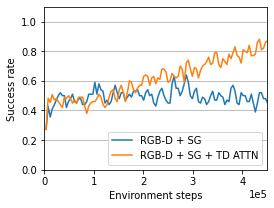

In [14]:
experiments = [
    #{
    #    "cat": "RGB-D + SG",
    #    "run": 2,
    #    "csv": "./choice_distractors/run-directed_search_hgt_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    #},
    {
        "cat": "RGB-D + SG",
        "run": 1,
        "csv": "./choice_distractors/run-directed_search_hgt_distractor_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "RGB-D + SG + TD ATTN",
        "run": 1,
        "csv": "./choice_distractors/run-directed_search_hfam_distractors_seed_1_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },


]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True)
ax.set_xlim(0, 0.35e6+1e5)
ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/directed_nav_distractors.pdf", bbox_inches='tight')


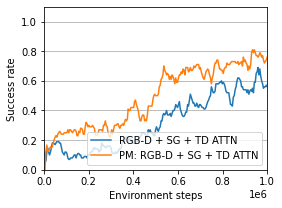

In [13]:
experiments = [
        {
        "cat": "RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./8_envs/run-hgt_fixed_attention_no_premap_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
    {
        "cat": "PM: RGB-D + SG + TD ATTN",
        "run": 2,
        "csv": "./8_envs/run-hgt_fixed_attention_seed_0_log-tag-ray_tune_custom_metrics_success_mean.csv",
    },
]
dfs = []
for experiment in experiments:
    df = pd.read_csv(experiment['csv'])
    df['cat'] = experiment['cat']
    df['run'] = experiment['run']
    df = df.rename(columns={"Value": "Success"})
    dfs.append(df)
success_df = pd.concat(dfs, ignore_index=True)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
sns.lineplot(data=success_df, x="Step", y="Success", hue="cat", ax=ax, legend=True)
ax.set_xlim(0, 0.9e6+1e5)
ax.set_ylim(0, 1.1)
#ax.set_xticks(np.arange(0, 0.5e6+1, 10e4))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
sns.move_legend(ax, "lower right")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Success rate")
ax.grid(visible=True, axis='y')
fig.savefig("/Users/michael/Downloads/exploratory_nav_8_envs.pdf", bbox_inches='tight')
